<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_imbalanced_dataset_classical_ML_approches_BOW(bi_and_uni_gram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package snowball_data to /root/nltk_data...


 0 - hate speech 1 - offensive language 2 - neither

In [2]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Mounted at /content/drive


In [3]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [4]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [5]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [7]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [8]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

In [9]:
#create a function to clean the data set witch includeremove sepecial charaters , puctuations,removing stopwords

# Initialize stemmer and stop words
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))



# Initialize stemmer and stop words
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Split text into words after removing stopwords
    words = [word for word in text.split(' ') if word not in stopword]

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join stemmed words back into text
    cleaned_text = " ".join(stemmed_words)

    return cleaned_text





In [10]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [11]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolov woman shouldnt complain clean ho...
1,1,3,0,3,0,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,3,0,2,1,1,rt cganderson vivabas look like tranni
4,4,6,0,6,0,1,rt shenikarobert shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie coreyemanuel right tl tras...
24779,25292,3,0,1,2,2,youv gone broke wrong heart babi drove redneck...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitch tellin lie


In [12]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,2,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [13]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center',
                 bbox=dict(facecolor='red', alpha=0.8))


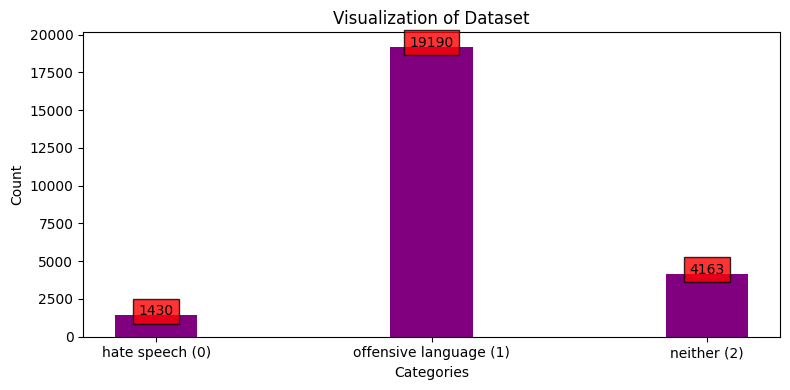

In [14]:
category = ['hate speech (0)', 'offensive language (1)', 'neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

fig = plt.figure(figsize=(8, 4))  # Adjust the figsize for a smaller graph

plt.bar(category, value_count, color='purple', width=0.3)  # Reduce the width of the bars

addlabels(category, value_count)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Visualization of Dataset")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()






In [15]:
y = df['class']
x = df.tweet

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word bi and uni gram method traing the models:***
     



In [17]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Transform training data
x_train_vectorizer = vectorizer.fit_transform(x_train)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Transform test data
x_test_vectorizer = vectorizer.transform(x_test)


***SVM model***

In [18]:
clf = svm.SVC()
clf.fit(x_train_vectorizer,y_train)

SVC()

In [19]:
SVM_output = clf.predict(x_test_vectorizer)

<Axes: >

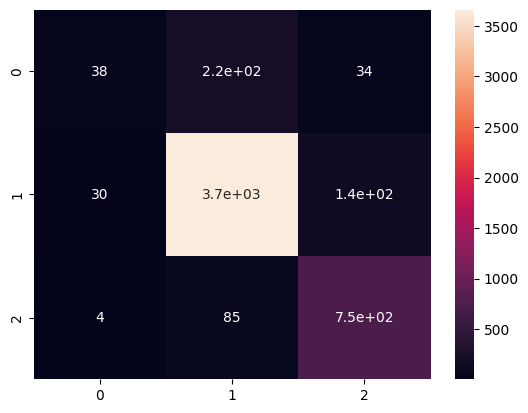

In [20]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_SVM, annot=True)


In [21]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21       290
           1       0.92      0.96      0.94      3832
           2       0.81      0.89      0.85       835

    accuracy                           0.90      4957
   macro avg       0.75      0.66      0.67      4957
weighted avg       0.88      0.90      0.88      4957



***Logistic Regression model***  

In [22]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train_vectorizer,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [23]:
logisticregresision_output = model.predict(x_test_vectorizer)


<Axes: >

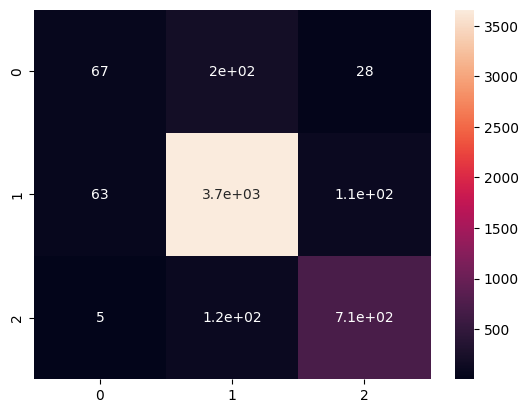

In [24]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_LogisticRegression, annot=True)


In [25]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.50      0.23      0.32       290
           1       0.92      0.95      0.94      3832
           2       0.84      0.85      0.84       835

    accuracy                           0.90      4957
   macro avg       0.75      0.68      0.70      4957
weighted avg       0.88      0.90      0.89      4957



***Decision Tree Classifier***

In [26]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train_vectorizer,y_train)


DecisionTreeClassifier(random_state=0)

In [27]:
decision_tree_output = clf.predict(x_test_vectorizer)

<Axes: >

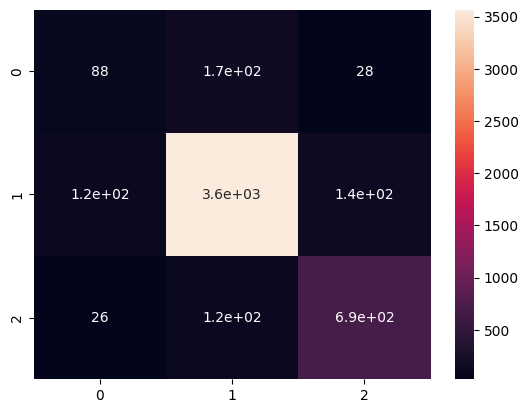

In [28]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_decision_tree, annot=True)

In [29]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.37      0.30      0.33       290
           1       0.92      0.93      0.93      3832
           2       0.80      0.83      0.81       835

    accuracy                           0.88      4957
   macro avg       0.70      0.69      0.69      4957
weighted avg       0.87      0.88      0.87      4957



***passive Aggressive***

In [30]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf.fit(x_train_vectorizer,y_train)

PassiveAggressiveClassifier(random_state=0)

In [31]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

<Axes: >

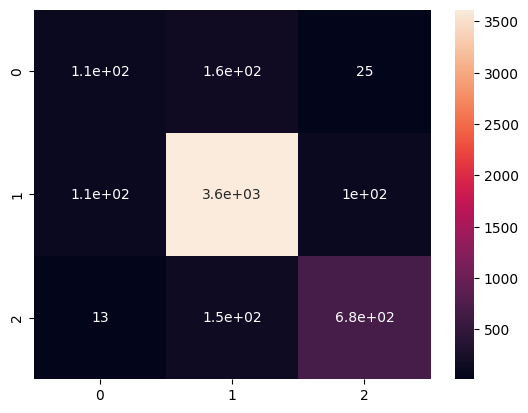

In [32]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [33]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.46      0.37      0.41       290
           1       0.92      0.94      0.93      3832
           2       0.84      0.81      0.82       835

    accuracy                           0.89      4957
   macro avg       0.74      0.71      0.72      4957
weighted avg       0.88      0.89      0.88      4957



***Naive Bayes***

In [ ]:
gnb = GaussianNB()
# Convert sparse matrices to dense arrays
x_train_dense = x_train_vectorizer.toarray()
x_test_dense = x_test_vectorizer.toarray()

# Fit the model using dense data
naive_bayes_output = gnb.fit(x_train_dense, y_train).predict(x_test_dense)


In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

***KNN model***

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_vectorizer,y_train)


In [ ]:
KNeighborsClassifier(...)

In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

***Random Forest***

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_vectorizer,y_train)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))